

# Import libraries.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


In [2]:
seed = 42
np.random.seed =seed

### Reading Data

In [3]:
titles = pd.read_csv('movies.csv')
titles.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
ratings = pd.read_csv('ratings.csv')
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


### Dataset Shape





In [5]:
print("The number of rows in  Rating Dataset is {} , \nThe number of columns in  data is {}".format(ratings.shape[0], ratings.shape[1]))
print("The number of rows in  movies data is {} , \nThe number of columns in  data is {}".format(titles.shape[0], titles.shape[1])) 

The number of rows in  Rating Dataset is 100836 , 
The number of columns in  data is 4
The number of rows in  movies data is 9742 , 
The number of columns in  data is 3


## Data Cleaning




### Dataset Information 

In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [8]:
#mergind data tables
df = pd.merge(ratings,titles,on='movieId')
df= df.drop(['timestamp'], axis=1)
df

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller


In [9]:
#get numerical column
numCol  = [col for col in df.columns if  df[col].dtype != "O"]
numCol

['userId', 'movieId', 'rating']

In [10]:
#get categorical column
catColumn  = [col for col in df.columns if  df[col].dtype == "O"]
catColumn

['title', 'genres']

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,100836.0,326.127564,182.618491,1.0,177.0,325.0,477.0,610.0
movieId,100836.0,19435.295718,35530.987199,1.0,1199.0,2991.0,8122.0,193609.0
rating,100836.0,3.501557,1.042529,0.5,3.0,3.5,4.0,5.0


### Dataset Statistics 




In [12]:
#check duplicate data 
def check_duplicate(df):
    if df.duplicated().all():
        return  'There are duplicate Data in Data Frame Nedded To be  removed . ' 
    else :
        return 'Data Is clean ,No Duplicate Data Found .'
check_duplicate(df)

'Data Is clean ,No Duplicate Data Found .'

In [13]:
# check missing Value
df.isnull().sum().sort_values(ascending=False)

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

In [14]:
df.shape

(100836, 5)

# Data Analysis & Visualization



### Distplot for Numerical Data 



C:\Users\yoges\AppData\Local\Temp\ipykernel_21612\2100025602.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True)


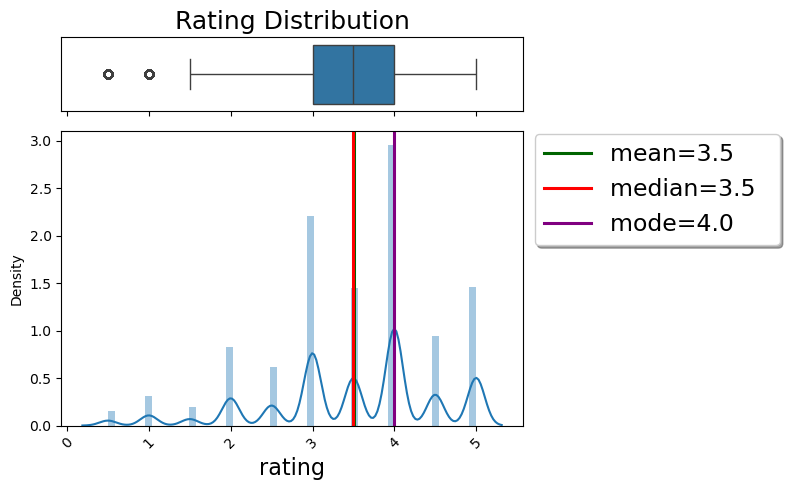

In [15]:
def numerical_plotting(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.distplot(df[col],kde=True)
    plt.xticks(rotation=45)
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()   
numerical_plotting(df,'rating','Rating Distribution','  ')

In [16]:
df.describe()[['rating']].T

,count,mean,std,min,25%,50%,75%,max
rating,100836.0,3.501557,1.042529,0.5,3.0,3.5,4.0,5.0


### Histogram

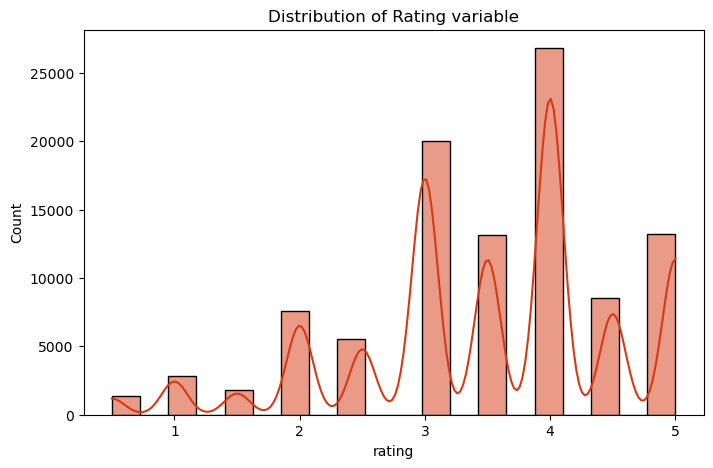

In [17]:
plt.figure(figsize=(8,5))
sns.histplot( x = df["rating"], bins = 20, kde = True, color = "#D63913").set(title = "Distribution of Rating variable");

### Box Plot 

C:\Users\yoges\AppData\Local\Temp\ipykernel_21612\32450284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = axes[0], x = "rating", y = "movieId", data = df, width = 0.7, orient = "v", fliersize = 5,
C:\Users\yoges\AppData\Local\Temp\ipykernel_21612\32450284.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = axes[1], x = "rating", y = "userId", data = df, width = 0.7, orient = "v", fliersize = 5,


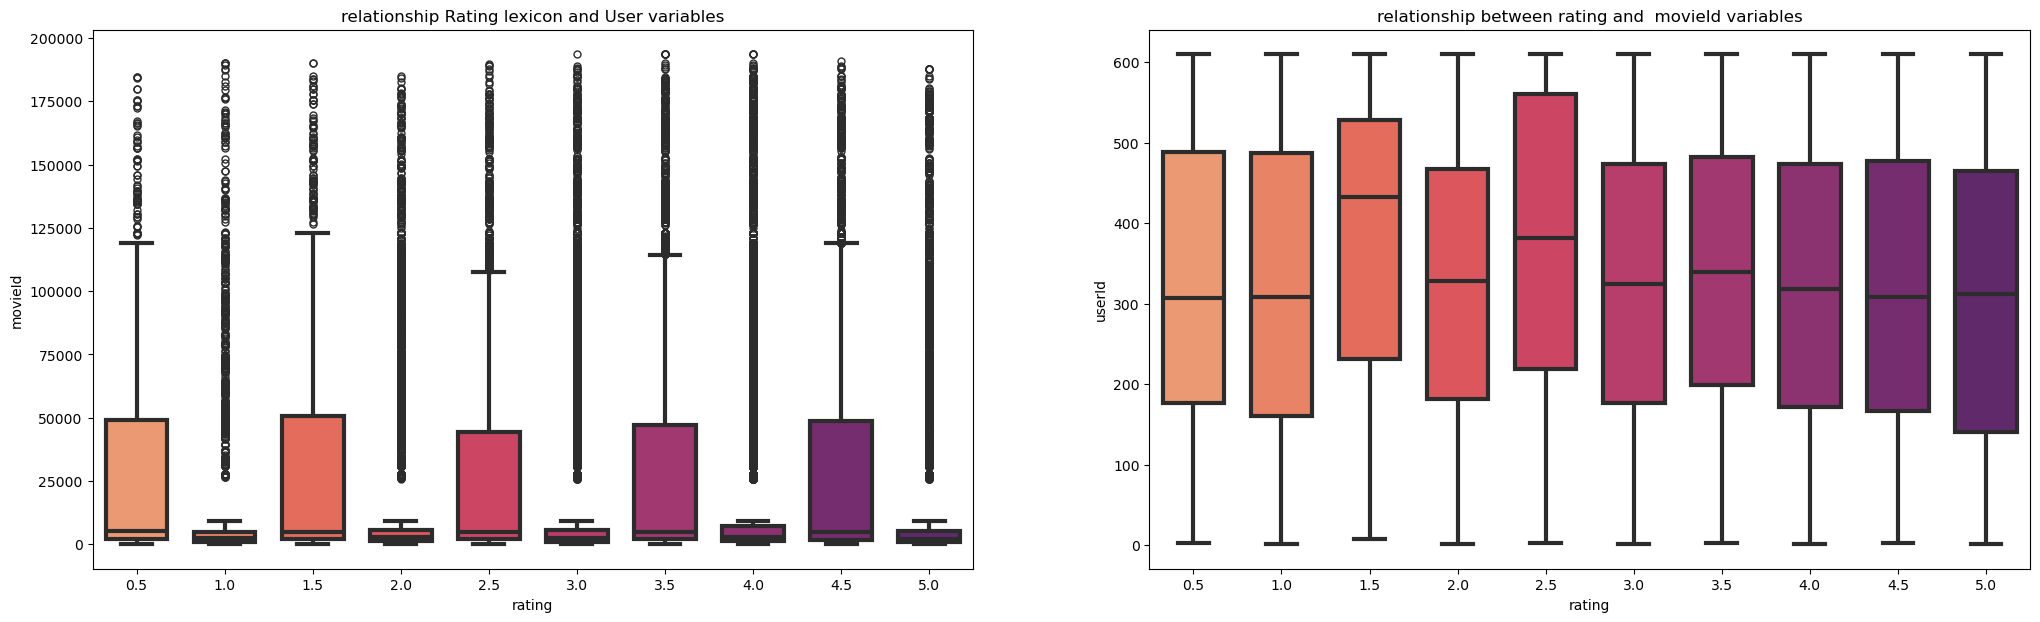

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (25, 7))
sns.boxplot(ax = axes[0], x = "rating", y = "movieId", data = df, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare');
axes[1].set_title("relationship between rating and  movieId variables");

sns.boxplot(ax = axes[1], x = "rating", y = "userId", data = df, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare')
axes[0].set_title("relationship Rating lexicon and User variables");  

### Pi Plot 


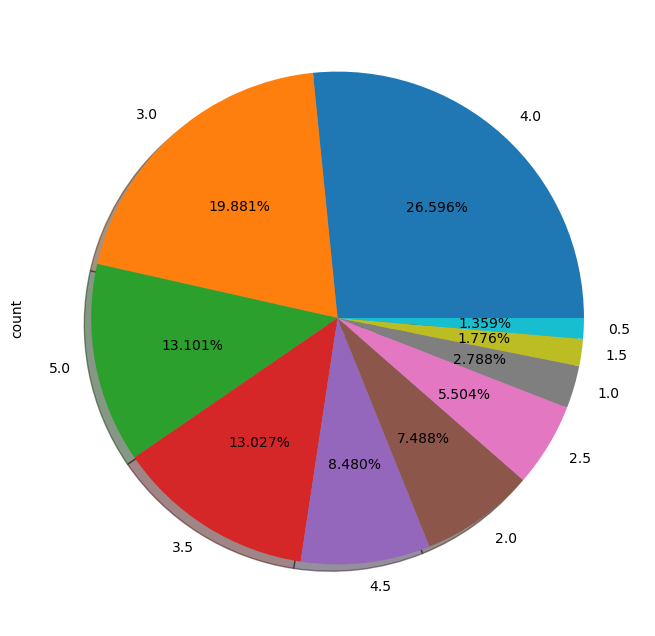

In [19]:
plt.figure(figsize = [8, 8], clear = True, )
df["rating"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);

### Correlation 

In [20]:
df['rating'].value_counts()

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [21]:
df['movieId'].value_counts()

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64

In [22]:
df=df.drop(["title","genres"],axis=1)
df.corr()

,userId,movieId,rating
userId,1.000000,0.006773,-0.049348
movieId,0.006773,1.000000,-0.004061
rating,-0.049348,-0.004061,1.000000


<Axes: >

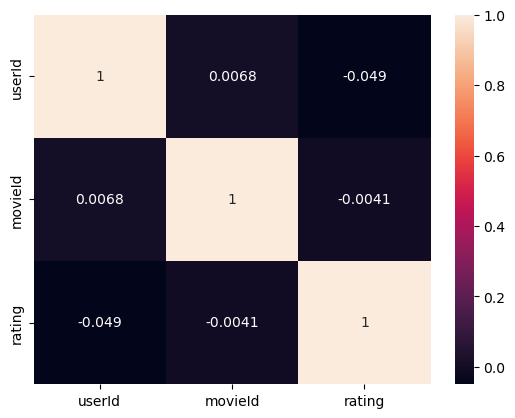

In [23]:
sns.heatmap(df.corr(),annot=True)